# Trading Simulator Demo

In [22]:
SYMBOL = "TVSMOTOR.NS"
START_DATE = "2022-01-01"
END_DATE = "2025-08-30"
SHORT_WINDOW = 20
LONG_WINDOW = 50
INITIAL_CASH = 100_000.0

[*********************100%***********************]  1 of 1 completed

Working dir: /Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator_2/notebooks
--- Starting Backtest Simulation ---
--- Simulation Complete ---

--- MA Crossover Performance ---
Initial Portfolio Value: $100,000.00
Final Portfolio Value:   $117,102.13
Total Return:            17.10%
Annualized Sharpe Ratio: 1.16


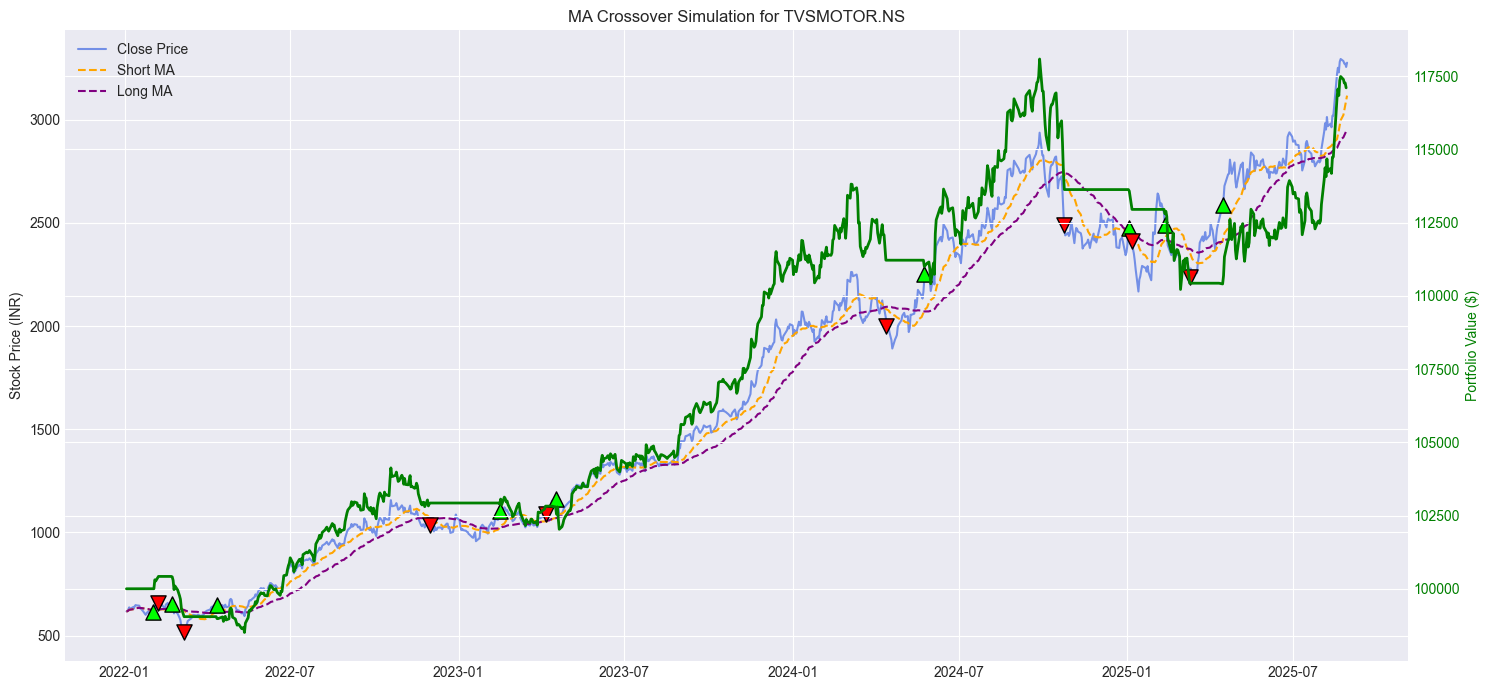

Saved portfolio_history_ma.csv


In [41]:
import os
print("Working dir:", os.getcwd())

import sys
sys.path.append('/Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator_2')

from src.simulator.data.loader import load_data
from src.simulator.execution.broker import PaperBroker
from src.simulator.strategies.ma_crossover import moving_average_crossover_strategy
from src.simulator.backtest.engine import run_backtest, evaluate_and_plot

# -------------------
# Parameters
# -------------------
SYMBOL = "TVSMOTOR.NS"
START_DATE = "2022-01-01"
INITIAL_CASH = 100_000.0
SHORT_WINDOW = 20
LONG_WINDOW  = 50
STRATEGY_NAME = "MA Crossover"

# -------------------
# Load Data
# -------------------
data = load_data(SYMBOL, START_DATE, END_DATE)
if data.empty:
    print("No data downloaded. Exiting.")
    raise SystemExit(1)

# -------------------
# Run Backtest
# -------------------
broker = PaperBroker(initial_cash=INITIAL_CASH)

# ✅ FIX: correct unpacking order
portfolio_history, signals = run_backtest(
    data,
    moving_average_crossover_strategy,
    broker,
    SYMBOL,
    short_window=SHORT_WINDOW,
    long_window=LONG_WINDOW
)

# -------------------

# Evaluate & Plot
# -------------------
if not portfolio_history.empty:
    evaluate_and_plot(
        portfolio_history,
        signals,
        data,
        SYMBOL,
        INITIAL_CASH,
        broker,
        STRATEGY_NAME
    )
    portfolio_history.to_csv("portfolio_history_ma.csv")
    print("Saved portfolio_history_ma.csv")
else:
    print("No trades executed for strategy.")


/Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator_2/notebooks
--- Starting Backtest Simulation ---
--- Simulation Complete ---

--- Linear regression Performance ---
Initial Portfolio Value: $100,000,000.00
Final Portfolio Value:   $113,907,971.15
Total Return:            13.91%
Annualized Sharpe Ratio: 1.17


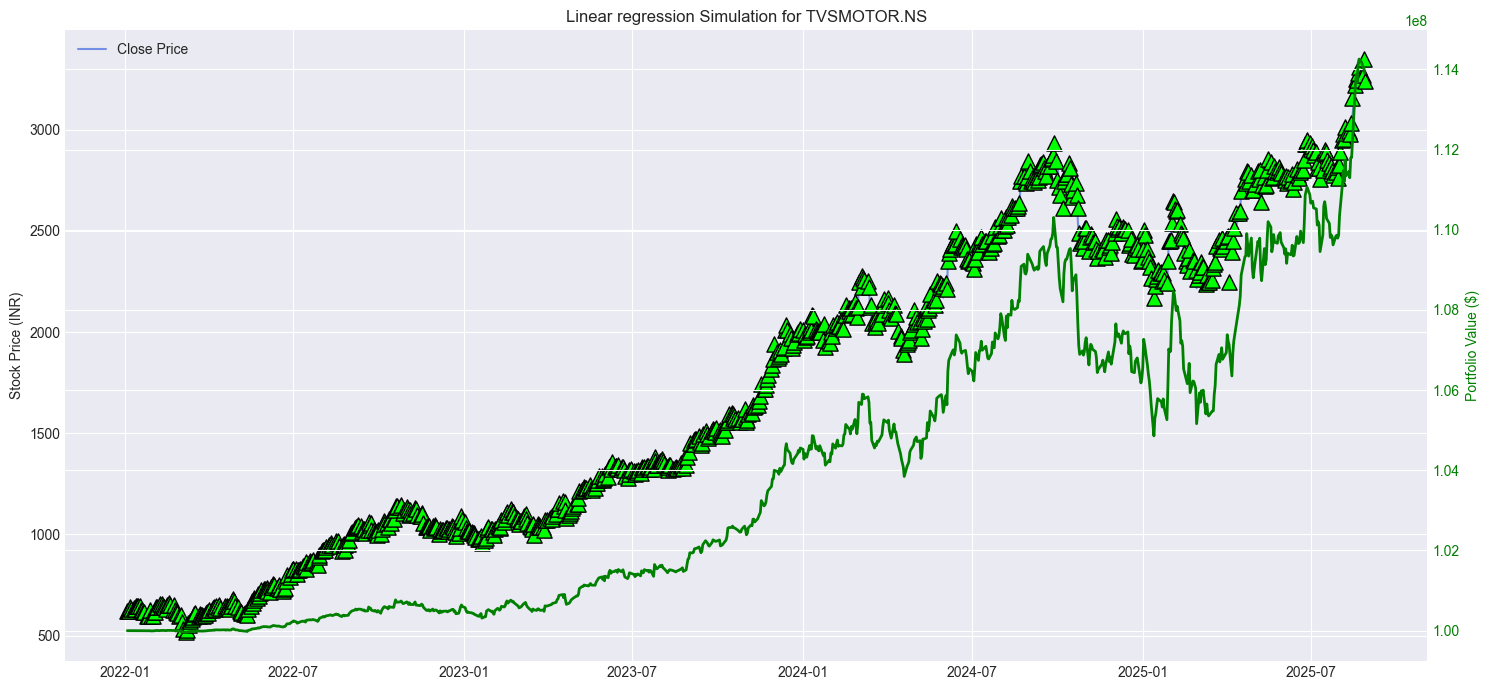

Saved portfolio_history_lr.csv


In [43]:
import os
print(os.getcwd())
import sys
sys.path.append('/Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator_2')

from src.simulator.strategies.btst_ml import ml_btst_strategy
from src.simulator.execution.broker import PaperBroker
from src.simulator.backtest.engine import run_backtest, evaluate_and_plot

# -------------------
# Parameters
# -------------------
SYMBOL = "TVSMOTOR.NS"
INITIAL_CASH = 100_000000.0

# -------------------
# Example: Run Linear Regression strategy
# -------------------
broker = PaperBroker(initial_cash=INITIAL_CASH)
signals_lr = ml_btst_strategy(data, model_type="lr")

portfolio_history_lr, signals_nb = run_backtest(
    data,
    lambda d: signals_lr,   # use precomputed signals
    broker,
    SYMBOL
)

if not portfolio_history_lr.empty:
    evaluate_and_plot(
        portfolio_history_lr,
        signals_nb,
        data,
        SYMBOL,
        INITIAL_CASH,
        broker,
        strategy_name="Linear regression"
    )
    portfolio_history_lr.to_csv("portfolio_history_lr.csv")
    print("Saved portfolio_history_lr.csv")


/Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator_2/notebooks
--- Starting Backtest Simulation ---
--- Simulation Complete ---

--- Naive Bayes Performance ---
Initial Portfolio Value: $100,000,000.00
Final Portfolio Value:   $113,907,971.15
Total Return:            13.91%
Annualized Sharpe Ratio: 1.17


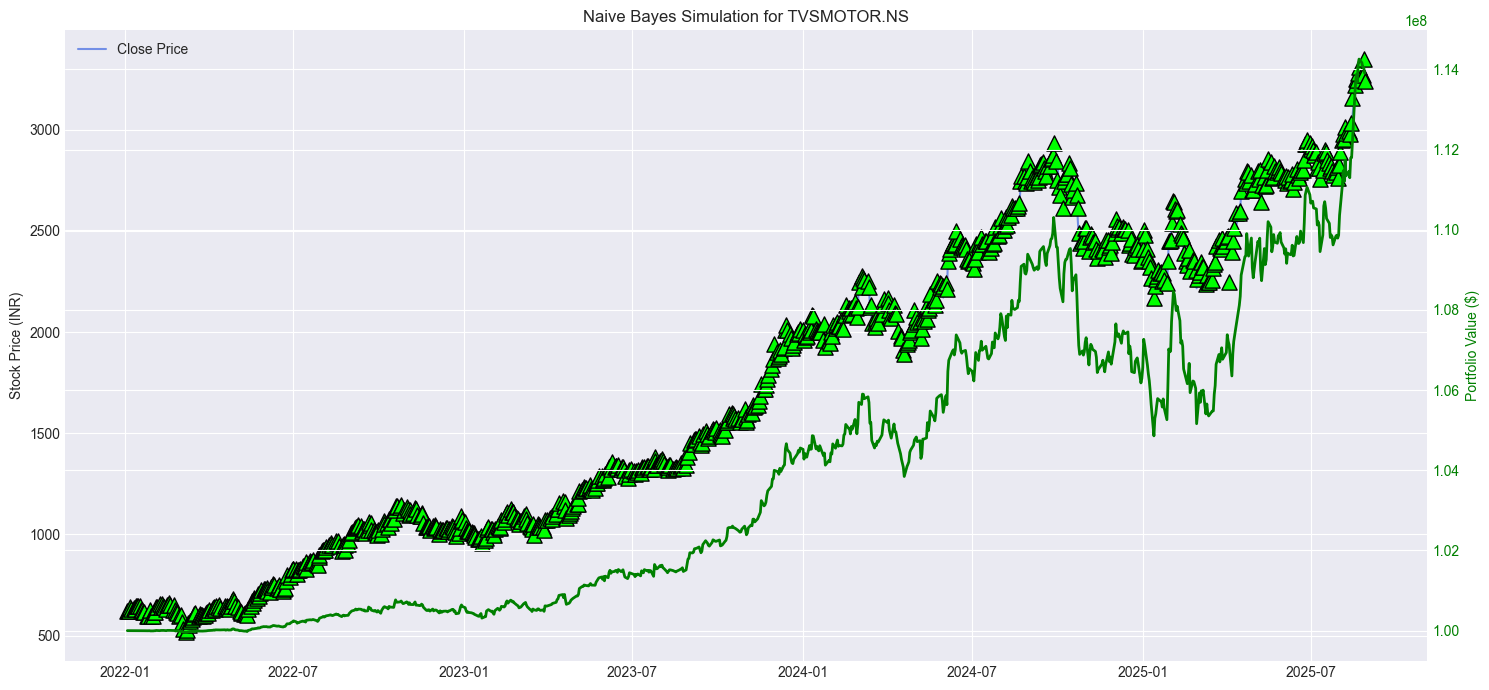

Saved portfolio_history_nb.csv


In [37]:
import os
print(os.getcwd())
import sys
sys.path.append('/Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator_2')

from src.simulator.strategies.btst_ml import ml_btst_strategy
from src.simulator.execution.broker import PaperBroker
from src.simulator.backtest.engine import run_backtest, evaluate_and_plot

# -------------------
# Parameters
# -------------------
SYMBOL = "TVSMOTOR.NS"
INITIAL_CASH = 100_000000.0

# -------------------
# Example: Run Naive Bayes strategy
# -------------------
broker = PaperBroker(initial_cash=INITIAL_CASH)
signals_nb = ml_btst_strategy(data, model_type="nb")

portfolio_history_nb, signals_nb = run_backtest(
    data,
    lambda d: signals_nb,   # use precomputed signals
    broker,
    SYMBOL
)

if not portfolio_history_nb.empty:
    evaluate_and_plot(
        portfolio_history_nb,
        signals_nb,
        data,
        SYMBOL,
        INITIAL_CASH,
        broker,
        strategy_name="Naive Bayes"
    )
    portfolio_history_nb.to_csv("portfolio_history_nb.csv")
    print("Saved portfolio_history_nb.csv")


--- Starting Backtest Simulation ---
--- Simulation Complete ---

--- kNN Performance ---
Initial Portfolio Value: $100,000,000.00
Final Portfolio Value:   $100,093,756.65
Total Return:            0.09%
Annualized Sharpe Ratio: 2.26


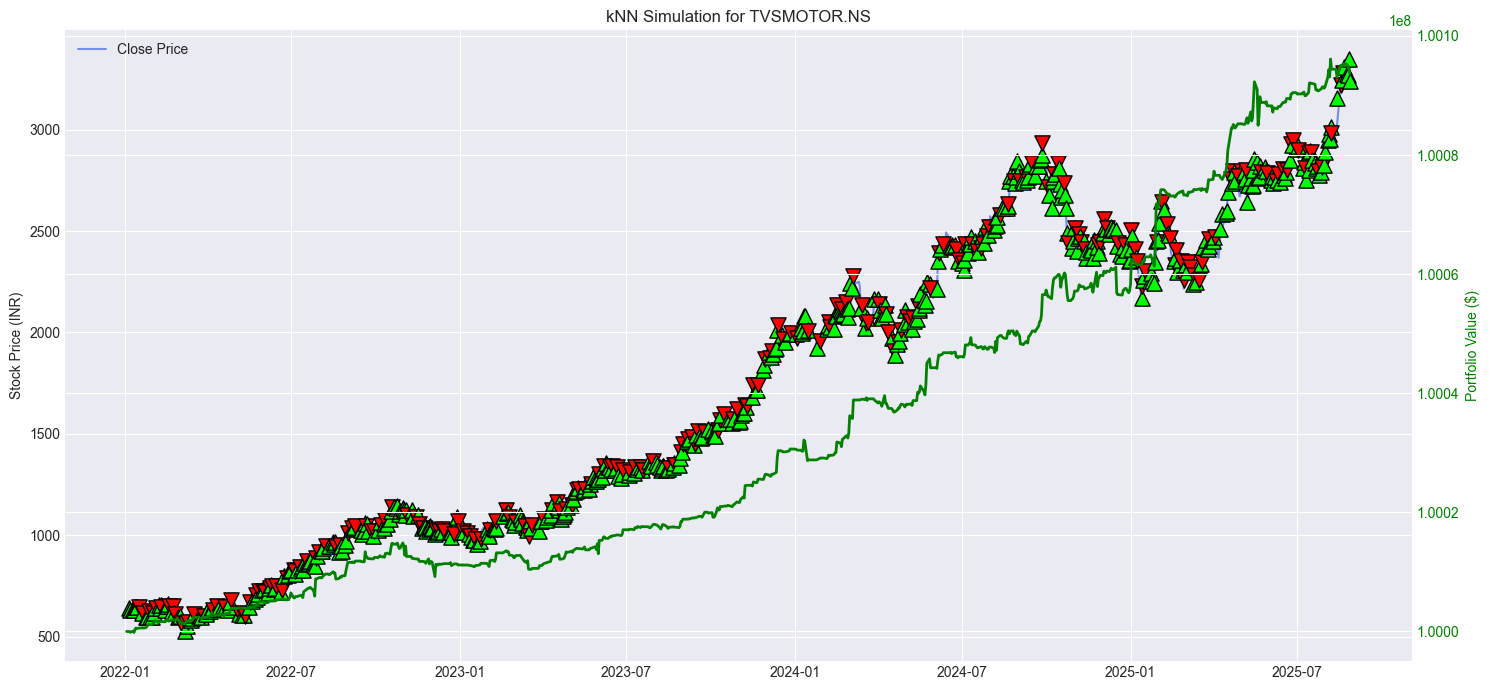

Saved portfolio_history_knn.csv


In [38]:

# -------------------
# Example: Run kNN strategy
# -------------------
broker = PaperBroker(initial_cash=INITIAL_CASH)
signals_knn = ml_btst_strategy(data, model_type="knn", n_neighbors=7)

portfolio_history_knn, signals_knn = run_backtest(
    data,
    lambda d: signals_knn,
    broker,
    SYMBOL
)

if not portfolio_history_knn.empty:
    evaluate_and_plot(
        portfolio_history_knn,
        signals_knn,
        data,
        SYMBOL,
        INITIAL_CASH,
        broker,
        strategy_name="kNN"
    )
    portfolio_history_knn.to_csv("portfolio_history_knn.csv")
    print("Saved portfolio_history_knn.csv")


In [8]:
import sys, importlib
from datetime import datetime, timedelta
sys.path.append('/Users/jayantparmar/Desktop/IIT Jodhput/IIT-Jodhpur/1st year/Trimester-1/Machine Learning/Practicals/trading_simulator')
from src.simulator.data import loader
importlib.reload(loader) 
from src.simulator.strategies.candlestick import candlestick_strategy
from src.simulator.execution.broker import PaperBroker
from src.simulator.backtest.engine import run_backtest, evaluate_and_plot
from src.simulator.data.loader import load_data

SYMBOL = "TCS.NS"

END_DATE = datetime.today().strftime("%Y-%m-%d")
START_DATE = (datetime.today() - timedelta(days=10)).strftime("%Y-%m-%d")

data = load_data(SYMBOL, START_DATE, END_DATE, interval="15m")

broker = PaperBroker(initial_cash=100000)
portfolio, signals = run_backtest(data, candlestick_strategy, broker, SYMBOL)

evaluate_and_plot(portfolio, signals, data, SYMBOL, 100000, broker, "Candlestick Strategy")


[*********************100%***********************]  1 of 1 completed


ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects